In [1]:
import time
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
import torchvision
from PIL import Image
import matplotlib.pyplot as plt

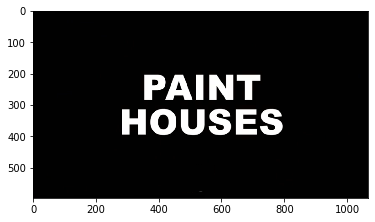

In [2]:
img = Image.open(r'D:\Github\Datasets\image\1.png')
plt.imshow(img)

In [3]:
def show_images(imgs, num_rows, num_cols, scale=2):
    '''
    按照输入参数行列显示图像
    '''
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    for i in range(num_rows):
        for j in range(num_cols):
            axes[i][j].imshow(imgs[i * num_cols + j])
            axes[i][j].axes.get_xaxis().set_visible(False)
            axes[i][j].axes.get_yaxis().set_visible(False)
    return axes

In [4]:
def apply(img, aug, num_rows=2, num_cols=4, scale=1.5):
    '''
    随机应用方法产生图片
    '''
    Y = [aug(img) for _ in range(num_rows * num_cols)]
    show_images(Y, num_rows, num_cols, scale)

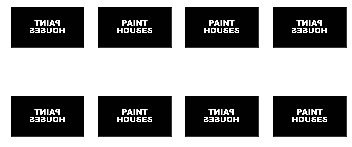

In [5]:
# 随机垂直翻转
apply(img, torchvision.transforms.RandomHorizontalFlip())

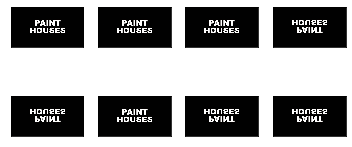

In [6]:
# 随机水平翻转
apply(img, torchvision.transforms.RandomVerticalFlip())

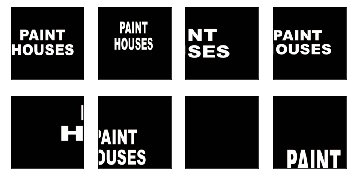

In [7]:
shape_aug = torchvision.transforms.RandomResizedCrop(200, scale=(0.1, 1), ratio=(0.5, 2))
# 随机裁剪，缩放200像素，采集区域比例为10%到100%，宽高比为0.5到2
apply(img, shape_aug)

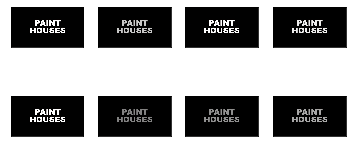

In [8]:
apply(img, torchvision.transforms.ColorJitter(brightness=0.5))
# 随机改变图片的亮度+-50%

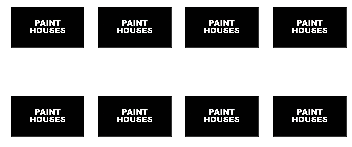

In [9]:
apply(img, torchvision.transforms.ColorJitter(hue=0.5))
# 随机该片图片的色调

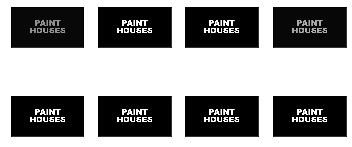

In [10]:
apply(img, torchvision.transforms.ColorJitter(contrast=0.5))
# 随机改变图片的对比度

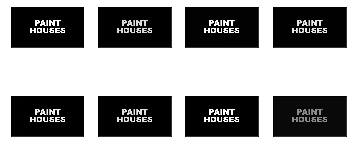

In [11]:
color_aug = torchvision.transforms.ColorJitter(
    brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5)
apply(img, color_aug)
# 同时改变图片的brightness亮度 contrast对比度 saturation饱和度 hue色调

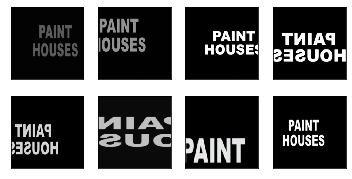

In [12]:
# 多个增广方法叠加
augs = torchvision.transforms.Compose([
    torchvision.transforms.RandomHorizontalFlip(), color_aug, shape_aug
])
apply(img, augs)